## Automatic Differentiation in PyTorch

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jonathandinu/youtube/blob/main/notebooks/pytorch-intro.ipynb) [![YouTube Video Views](https://img.shields.io/youtube/views/NKU4hMvu2fY)](https://youtu.be/NKU4hMvu2fY) [![GitHub Repo stars](https://img.shields.io/github/stars/jonathandinu/youtube?style=social)](https://github.com/jonathandinu/youtube)

> Colab for interactive execution in your browser (no setup) and repository for notebook index and additional resources/code.

### References and Resources

* The Fundamentals of Autograd: https://docs.pytorch.org/tutorials/beginner/introyt/autogradyt_tutorial.html
* A Gentle Introduction to `torch.autograd`: https://docs.pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
* Overview of the PyTorch Autograd Engine: https://pytorch.org/blog/overview-of-pytorch-autograd-engine/
* Computing Neural Network Gradients: https://web.stanford.edu/class/cs224n/readings/gradient-notes.pdf
* CS340 Automatic Differentiation https://www.cs.ubc.ca/~fwood/CS340/lectures/AD1.pdf
* CSC321 Lecture 10: Automatic Differentiation: https://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/slides/lec10.pdf

In [1]:
import torch

In [2]:
x = torch.arange(0, 1, step=0.1, requires_grad=True)
x

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000], requires_grad=True)

In [3]:
y = 3 * x**2 + 2 * x

In [4]:
y

tensor([0.0000, 0.2300, 0.5200, 0.8700, 1.2800, 1.7500, 2.2800, 2.8700, 3.5200,
        4.2300], grad_fn=<AddBackward0>)

In [5]:
import matplotlib.pyplot as plt

plt.plot(x.numpy(), y.numpy())

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [ ]:
x.requires_grad

True

In [ ]:
# x = torch.arange(0, 1, step=0.1, requires_grad=False)
x.detach().requires_grad

False

In [ ]:
y.backward(gradient=torch.ones(10))

In [ ]:
x.grad # dy / dx_1, dy/dx_2 ..., dy/ dx_m

tensor([2.0000, 2.6000, 3.2000, 3.8000, 4.4000, 5.0000, 5.6000, 6.2000, 6.8000,
        7.4000])

In [ ]:
x = torch.arange(0, 1, step=0.1, requires_grad=True)
y = 3 * x**2 + 2 * x # 6x + 2
z = torch.sum(y)

In [ ]:
z

tensor(17.5500, grad_fn=<SumBackward0>)

In [ ]:
z.backward()

In [ ]:
x.grad # dz/ dx_1 == dy / dx_1

tensor([2.0000, 2.6000, 3.2000, 3.8000, 4.4000, 5.0000, 5.6000, 6.2000, 6.8000,
        7.4000])

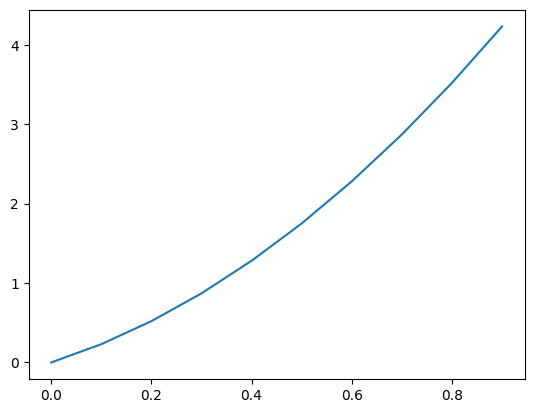

In [ ]:
plt.plot(x.detach().numpy(), y.detach().numpy())

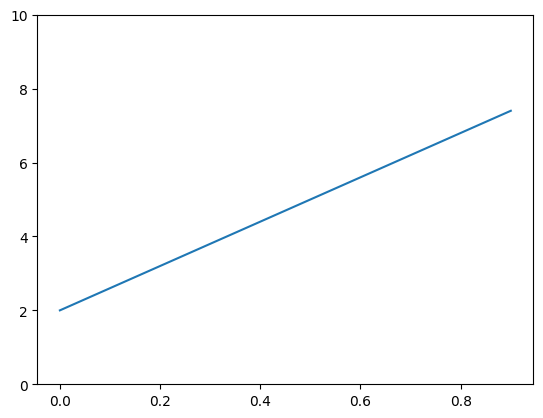

In [ ]:
with torch.no_grad():
    plt.plot(x.numpy(), x.grad.numpy())
    plt.ylim(0, 10) # 

In [ ]:
for _ in range(5):
    # the `grad` attribute is initialized to `None`
    print(x.grad)
    x.grad.zero_()

    # need to create a new 'y' computational graph
    y = 3 * x**2 + 2 * x

    # each call to `backward()` adds to existing stored gradients
    y.backward(gradient=torch.ones(10))

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([2.0000, 2.6000, 3.2000, 3.8000, 4.4000, 5.0000, 5.6000, 6.2000, 6.8000,
        7.4000])
tensor([2.0000, 2.6000, 3.2000, 3.8000, 4.4000, 5.0000, 5.6000, 6.2000, 6.8000,
        7.4000])
tensor([2.0000, 2.6000, 3.2000, 3.8000, 4.4000, 5.0000, 5.6000, 6.2000, 6.8000,
        7.4000])
tensor([2.0000, 2.6000, 3.2000, 3.8000, 4.4000, 5.0000, 5.6000, 6.2000, 6.8000,
        7.4000])
